In [ ]:
## Data Privacy & Reproducibility Note
#This notebook documents the analytical workflow and findings of a university research project.
#Due to privacy considerations, raw datasets containing identifiable information are not publicly shared.

#The data files included in this repository represent anonymized and analysis-ready versions of the
#original datasets. As a result, some intermediate steps involving identifiable attributes
#(e.g., instructor names) are presented conceptually and may not be directly reproducible using
#the public data.

# **Data wrangling**

In [3]:
# importing necessary libriaries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from google.colab import files

In [5]:
# getting all our files, and naming them

In [6]:
df1 = pd.read_csv('2021-2022_1.csv')
df2 = pd.read_csv('2021-2022_2.csv')
df3 = pd.read_csv('2022-2023_1.csv')
df4 = pd.read_csv('2022-2023_2.csv')
df5 = pd.read_csv('2023-2024_1.csv')

In [7]:
dfs = [df1, df2, df3, df4, df5]

# Assigning new semester values from 1 to 5
for i, df in enumerate(dfs, start=1):
    df["Semester"] = i

# Now df1["Semester"] = 1, df2["Semester"] = 2, ..., df5["Semester"] = 5
dfs = [df1, df2, df3, df4, df5]

# Assigning new semester values from 1 to 5
for i, df in enumerate(dfs, start=1):
    df["Semester"] = i

In [8]:
df5

,Code,Subject,Teacher,Dept,Level,A,B,C,D,FX,F,Pass,Not Pass,IP,W,Total,%,Gender,Semester,Year
0,ACC 207,Principles of Accounting,Aisulu Baibekova,BS,0,3,15,35,12,4,17,0,0,0,6,92,3.3% 16.3% 38% 13% 22.8%,1,5,2023
1,ACC 207,Principles of Accounting,Firuza Osmanova,BS,0,32,31,22,28,4,27,0,0,0,7,151,21.2% 20.5% 14.6% 18.5% 20.5%,1,5,2023
2,ACC 302,Audit and Assurance (ACCA),Roza Orazalina,BS,0,0,13,25,9,0,4,0,0,0,0,51,0% 25.5% 49% 17.6% 7.8%,1,5,2023
3,ACC 302,Audit and Assurance (ACCA),Temirlan Tenezbayev,BS,0,19,18,32,15,5,9,0,0,0,0,98,19.4% 18.4% 32.7% 15.3% 14.3%,0,5,2023
4,ACC 303,Taxation (ACCA),Diana Tashanova,BS,0,23,30,36,34,0,9,0,0,0,2,134,17.2% 22.4% 26.9% 25.4% 6.7%,1,5,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,TRA 301,Practice of Literary Translation (Kazakh/ Russ...,Madina Ashirimbetova,PED,0,24,21,4,1,1,1,0,0,0,0,52,46.2% 40.4% 7.7% 1.9% 3.8%,1,5,2023
658,TRA 323,Consecutive interpreting 1,Diyar Nurmetov,PED,0,40,43,25,7,6,11,0,0,0,0,132,30.3% 32.6% 18.9% 5.3% 12.9%,0,5,2023
659,TRA 331,Techniques of Financial and Official Texts Tra...,"Leila Mirzoyeva, Doctor of Science",PED,1,55,41,13,3,4,5,0,0,0,2,123,44.7% 33.3% 10.6% 2.4% 7.3%,1,5,2023
660,TRA 452,Simultaneous Interpreting 2,Diyar Nurmetov,PED,0,2,7,9,2,1,1,0,0,0,0,22,9.1% 31.8% 40.9% 9.1% 9.1%,0,5,2023


In [9]:
# renaming columns, to be able to concatenate csv files into 1

In [10]:
df1.rename(columns={'#VALUE!': '%'}, inplace=True)
df2.rename(columns={'#VALUE!': '%'}, inplace=True)

In [11]:
df1.rename(columns={'Title': 'Subject'}, inplace=True)
df2.rename(columns={'Title': 'Subject'}, inplace=True)

In [12]:
df1.rename(columns={'Not pass': 'Not Pass'}, inplace=True)
df2.rename(columns={'Not pass': 'Not Pass'}, inplace=True)

In [13]:
# concatenating csv files

In [14]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

df.to_csv('2021-2024_project.csv', index=False)
df

,Code,Subject,Teacher,Dept,Level,A,B,C,D,F,FX,Pass,Not Pass,IP,W,Total,%,Gender,Semester,Year
0,ACC 306,Tax Accounting and Reporting,"Roza Tulegenova, Candidate of Science",BS,1.0,5.0,2.0,8.0,8.0,0.0,4.0,0.0,0.0,0.0,0.0,27.0,18.5% 7.4% 29.6% 29.6% 14.8%,1,1,2021
1,CEC 103,General English (B1 level),Aigerim Orynbassarova,PED,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,6.0,0.0,0.0,22.0,0% 0% 0% 0% 0%,1,1,2021
2,CSS 105,Fundamentals of Programming,Meraryslan Meraliyev,ENG,0.0,7.0,8.0,27.0,16.0,4.0,19.0,0.0,0.0,0.0,1.0,82.0,8.5% 9.8% 32.9% 19.5% 28%,0,1,2021
3,CSS 108,Programming Technologies and Educational Practice,"Madina Abdykarim, Doctor PhD",ENG,1.0,3.0,5.0,9.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,32.0,9.4% 15.6% 28.1% 15.6% 31.3%,1,1,2021
4,CSS 108,Programming Technologies and Educational Practice,Timur Yeslamgaliyev,ENG,0.0,52.0,113.0,176.0,149.0,83.0,96.0,0.0,0.0,0.0,5.0,674.0,7.7% 16.8% 26.1% 22.1% 26.6%,0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,TRA 301,Practice of Literary Translation (Kazakh/ Russ...,Madina Ashirimbetova,PED,0.0,24.0,21.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,52.0,46.2% 40.4% 7.7% 1.9% 3.8%,1,5,2023
3260,TRA 323,Consecutive interpreting 1,Diyar Nurmetov,PED,0.0,40.0,43.0,25.0,7.0,11.0,6.0,0.0,0.0,0.0,0.0,132.0,30.3% 32.6% 18.9% 5.3% 12.9%,0,5,2023
3261,TRA 331,Techniques of Financial and Official Texts Tra...,"Leila Mirzoyeva, Doctor of Science",PED,1.0,55.0,41.0,13.0,3.0,5.0,4.0,0.0,0.0,0.0,2.0,123.0,44.7% 33.3% 10.6% 2.4% 7.3%,1,5,2023
3262,TRA 452,Simultaneous Interpreting 2,Diyar Nurmetov,PED,0.0,2.0,7.0,9.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,22.0,9.1% 31.8% 40.9% 9.1% 9.1%,0,5,2023


In [15]:
# concatenating 3 columns into 1, for getting more unique values in column teacher
# because initially there may be several rows with the same teacher but in diferrent semesters

In [16]:
df['ON_Teacher'] = df['Teacher']
df['Teacher'] = df['Teacher'] + ' (' + df['Year'].astype(str) + '.' + df['Semester'].astype(str) + ')'
df

,Code,Subject,Teacher,Dept,Level,A,B,C,D,F,...,Pass,Not Pass,IP,W,Total,%,Gender,Semester,Year,ON_Teacher
0,ACC 306,Tax Accounting and Reporting,"Roza Tulegenova, Candidate of Science (2021.1)",BS,1.0,5.0,2.0,8.0,8.0,0.0,...,0.0,0.0,0.0,0.0,27.0,18.5% 7.4% 29.6% 29.6% 14.8%,1,1,2021,"Roza Tulegenova, Candidate of Science"
1,CEC 103,General English (B1 level),Aigerim Orynbassarova (2021.1),PED,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,6.0,0.0,0.0,22.0,0% 0% 0% 0% 0%,1,1,2021,Aigerim Orynbassarova
2,CSS 105,Fundamentals of Programming,Meraryslan Meraliyev (2021.1),ENG,0.0,7.0,8.0,27.0,16.0,4.0,...,0.0,0.0,0.0,1.0,82.0,8.5% 9.8% 32.9% 19.5% 28%,0,1,2021,Meraryslan Meraliyev
3,CSS 108,Programming Technologies and Educational Practice,"Madina Abdykarim, Doctor PhD (2021.1)",ENG,1.0,3.0,5.0,9.0,5.0,4.0,...,0.0,0.0,0.0,0.0,32.0,9.4% 15.6% 28.1% 15.6% 31.3%,1,1,2021,"Madina Abdykarim, Doctor PhD"
4,CSS 108,Programming Technologies and Educational Practice,Timur Yeslamgaliyev (2021.1),ENG,0.0,52.0,113.0,176.0,149.0,83.0,...,0.0,0.0,0.0,5.0,674.0,7.7% 16.8% 26.1% 22.1% 26.6%,0,1,2021,Timur Yeslamgaliyev
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,TRA 301,Practice of Literary Translation (Kazakh/ Russ...,Madina Ashirimbetova (2023.5),PED,0.0,24.0,21.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,52.0,46.2% 40.4% 7.7% 1.9% 3.8%,1,5,2023,Madina Ashirimbetova
3260,TRA 323,Consecutive interpreting 1,Diyar Nurmetov (2023.5),PED,0.0,40.0,43.0,25.0,7.0,11.0,...,0.0,0.0,0.0,0.0,132.0,30.3% 32.6% 18.9% 5.3% 12.9%,0,5,2023,Diyar Nurmetov
3261,TRA 331,Techniques of Financial and Official Texts Tra...,"Leila Mirzoyeva, Doctor of Science (2023.5)",PED,1.0,55.0,41.0,13.0,3.0,5.0,...,0.0,0.0,0.0,2.0,123.0,44.7% 33.3% 10.6% 2.4% 7.3%,1,5,2023,"Leila Mirzoyeva, Doctor of Science"
3262,TRA 452,Simultaneous Interpreting 2,Diyar Nurmetov (2023.5),PED,0.0,2.0,7.0,9.0,2.0,1.0,...,0.0,0.0,0.0,0.0,22.0,9.1% 31.8% 40.9% 9.1% 9.1%,0,5,2023,Diyar Nurmetov


In [17]:
# checking for duplicates based on connection of 3 features

In [18]:
df.duplicated(subset=['Subject', 'Teacher', 'Code']).sum()

np.int64(15)

In [19]:
# then looking at them, are they really duplicates or what
# and as you can see now they have same grades^ so they are duplicates

In [20]:
duplicate_rows = df.duplicated(subset=['Subject', 'Teacher', 'Code'], keep=False)

df[duplicate_rows].head(20)

,Code,Subject,Teacher,Dept,Level,A,B,C,D,F,...,Pass,Not Pass,IP,W,Total,%,Gender,Semester,Year,ON_Teacher
255,MAT 154,Mathematics for Computer Science 2,"Aiman Shakulikova, Candidate of Science (2021.1)",ENG,1.0,4.0,15.0,29.0,35.0,20.0,...,0.0,0.0,0.0,0.0,131.0,3.1% 11.5% 22.1% 26.7% 36.6%,1,1,2021,"Aiman Shakulikova, Candidate of Science"
256,MAT 154,Mathematics for Computer Science 2,"Aiman Shakulikova, Candidate of Science (2021.1)",PED,1.0,4.0,15.0,29.0,35.0,20.0,...,0.0,0.0,0.0,0.0,131.0,3.1% 11.5% 22.1% 26.7% 36.6%,1,1,2021,"Aiman Shakulikova, Candidate of Science"
460,TFL 120,Foreign language (В1) ENGLISH - 2,Meruyert Birleskyzy (2021.1),ENG,0.0,12.0,33.0,23.0,2.0,1.0,...,0.0,0.0,0.0,0.0,78.0,15.4% 42.3% 29.5% 2.6% 10.3%,1,1,2021,Meruyert Birleskyzy
461,TFL 120,Foreign language (В1) ENGLISH - 2,Meruyert Birleskyzy (2021.1),PED,0.0,12.0,33.0,23.0,2.0,1.0,...,0.0,0.0,0.0,0.0,78.0,15.4% 42.3% 29.5% 2.6% 10.3%,1,1,2021,Meruyert Birleskyzy
542,MDE 107,Foreign Language 1 (General English - A1 level),Abbas Bodaubekov (2021.2),LAW,0.0,1.0,6.0,17.0,15.0,3.0,...,0.0,0.0,0.0,0.0,44.0,2.3% 13.6% 38.6% 34.1% 11.4%,0,2,2021,Abbas Bodaubekov
543,MDE 107,Foreign Language 1 (General English - A1 level),Abbas Bodaubekov (2021.2),PED,0.0,1.0,6.0,17.0,15.0,3.0,...,0.0,0.0,0.0,0.0,44.0,2.3% 13.6% 38.6% 34.1% 11.4%,0,2,2021,Abbas Bodaubekov
597,MAT 205,Ordinary differential equations,"Aishabibi Dukenbayeva, Doctor PhD (2021.2)",ENG,1.0,18.0,22.0,39.0,45.0,7.0,...,0.0,0.0,0.0,0.0,153.0,11.8% 14.4% 25.5% 29.4% 19%,1,2,2021,"Aishabibi Dukenbayeva, Doctor PhD"
598,MAT 205,Ordinary differential equations,"Aishabibi Dukenbayeva, Doctor PhD (2021.2)",BS,1.0,18.0,22.0,39.0,45.0,7.0,...,0.0,0.0,0.0,0.0,153.0,11.8% 14.4% 25.5% 29.4% 19%,1,2,2021,"Aishabibi Dukenbayeva, Doctor PhD"
619,CSS 105,Fundamentals of Programming,Akerke Alseitova (2021.2),ENG,0.0,25.0,47.0,67.0,60.0,25.0,...,0.0,0.0,0.0,3.0,277.0,9% 17% 24.2% 21.7% 27.1%,1,2,2021,Akerke Alseitova
620,CSS 105,Fundamentals of Programming,Akerke Alseitova (2021.2),BS,0.0,25.0,47.0,67.0,60.0,25.0,...,0.0,0.0,0.0,3.0,277.0,9% 17% 24.2% 21.7% 27.1%,1,2,2021,Akerke Alseitova


In [21]:
# dropping them and saving the first one

In [22]:
df.drop_duplicates(subset=['Code', 'Subject', 'Teacher'], keep='first', inplace=True)

In [23]:
# final check of duplicates

In [24]:
df.duplicated(subset=['Subject', 'Teacher', 'Code']).sum()

np.int64(0)

In [25]:
# checing for null values

In [26]:
df.isnull().sum()

,0
Code,0
Subject,0
Teacher,0
Dept,0
Level,1
A,1
B,1
C,1
D,1
F,1


In [27]:
# looked interesting and wanted to check, maybe its the whole row with buch of missed values
# and its exactly as we thought it is

In [28]:
df[df.isnull().any(axis=1)]

,Code,Subject,Teacher,Dept,Level,A,B,C,D,F,...,Pass,Not Pass,IP,W,Total,%,Gender,Semester,Year,ON_Teacher
39,CSS 592,Pedagogical practice in High Education Department,Kamila Orynbekova (2021.1),ENG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2021,Kamila Orynbekova


In [29]:
# so we just dropped it

In [30]:
df.dropna(inplace=True)

In [31]:
# final check

In [32]:
df.isnull().sum()

,0
Code,0
Subject,0
Teacher,0
Dept,0
Level,0
A,0
B,0
C,0
D,0
F,0


In [33]:
# find out that sometimes teachers are formally in the system, so they've got little amount of studens
# wanted to check how many are they in our dataset

In [34]:
filtered_rows = df[df['Total'] <= 4]

len(filtered_rows)

252

In [35]:
# and we filtered it

In [36]:
filtered_rows = df[df['Total'] > 4]

df = filtered_rows

In [37]:
# checking our dataset

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2996 entries, 0 to 3263
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Code        2996 non-null   object 
 1   Subject     2996 non-null   object 
 2   Teacher     2996 non-null   object 
 3   Dept        2996 non-null   object 
 4   Level       2996 non-null   float64
 5   A           2996 non-null   float64
 6   B           2996 non-null   float64
 7   C           2996 non-null   float64
 8   D           2996 non-null   float64
 9   F           2996 non-null   float64
 10  FX          2996 non-null   float64
 11  Pass        2996 non-null   float64
 12  Not Pass    2996 non-null   float64
 13  IP          2996 non-null   float64
 14  W           2996 non-null   float64
 15  Total       2996 non-null   float64
 16  %           2996 non-null   object 
 17  Gender      2996 non-null   int64  
 18  Semester    2996 non-null   int64  
 19  Year        2996 non-null   int6

In [39]:
df

,Code,Subject,Teacher,Dept,Level,A,B,C,D,F,...,Pass,Not Pass,IP,W,Total,%,Gender,Semester,Year,ON_Teacher
0,ACC 306,Tax Accounting and Reporting,"Roza Tulegenova, Candidate of Science (2021.1)",BS,1.0,5.0,2.0,8.0,8.0,0.0,...,0.0,0.0,0.0,0.0,27.0,18.5% 7.4% 29.6% 29.6% 14.8%,1,1,2021,"Roza Tulegenova, Candidate of Science"
1,CEC 103,General English (B1 level),Aigerim Orynbassarova (2021.1),PED,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,6.0,0.0,0.0,22.0,0% 0% 0% 0% 0%,1,1,2021,Aigerim Orynbassarova
2,CSS 105,Fundamentals of Programming,Meraryslan Meraliyev (2021.1),ENG,0.0,7.0,8.0,27.0,16.0,4.0,...,0.0,0.0,0.0,1.0,82.0,8.5% 9.8% 32.9% 19.5% 28%,0,1,2021,Meraryslan Meraliyev
3,CSS 108,Programming Technologies and Educational Practice,"Madina Abdykarim, Doctor PhD (2021.1)",ENG,1.0,3.0,5.0,9.0,5.0,4.0,...,0.0,0.0,0.0,0.0,32.0,9.4% 15.6% 28.1% 15.6% 31.3%,1,1,2021,"Madina Abdykarim, Doctor PhD"
4,CSS 108,Programming Technologies and Educational Practice,Timur Yeslamgaliyev (2021.1),ENG,0.0,52.0,113.0,176.0,149.0,83.0,...,0.0,0.0,0.0,5.0,674.0,7.7% 16.8% 26.1% 22.1% 26.6%,0,1,2021,Timur Yeslamgaliyev
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,TRA 301,Practice of Literary Translation (Kazakh/ Russ...,Madina Ashirimbetova (2023.5),PED,0.0,24.0,21.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,52.0,46.2% 40.4% 7.7% 1.9% 3.8%,1,5,2023,Madina Ashirimbetova
3260,TRA 323,Consecutive interpreting 1,Diyar Nurmetov (2023.5),PED,0.0,40.0,43.0,25.0,7.0,11.0,...,0.0,0.0,0.0,0.0,132.0,30.3% 32.6% 18.9% 5.3% 12.9%,0,5,2023,Diyar Nurmetov
3261,TRA 331,Techniques of Financial and Official Texts Tra...,"Leila Mirzoyeva, Doctor of Science (2023.5)",PED,1.0,55.0,41.0,13.0,3.0,5.0,...,0.0,0.0,0.0,2.0,123.0,44.7% 33.3% 10.6% 2.4% 7.3%,1,5,2023,"Leila Mirzoyeva, Doctor of Science"
3262,TRA 452,Simultaneous Interpreting 2,Diyar Nurmetov (2023.5),PED,0.0,2.0,7.0,9.0,2.0,1.0,...,0.0,0.0,0.0,0.0,22.0,9.1% 31.8% 40.9% 9.1% 9.1%,0,5,2023,Diyar Nurmetov


In [40]:
# saw that there is a column "%" which contains too many info for 1 column
# so we split the "%" column into five separate columns
# assign column names to the new DataFrame
# and concatenate the new DataFrame with the original DataFrame

In [41]:
percentages = df['%'].str.split(expand=True)

percentages.columns = ['A%', 'B%', 'C%', 'D%', 'FFX%']

df = pd.concat([df, percentages], axis=1)

df

,Code,Subject,Teacher,Dept,Level,A,B,C,D,F,...,%,Gender,Semester,Year,ON_Teacher,A%,B%,C%,D%,FFX%
0,ACC 306,Tax Accounting and Reporting,"Roza Tulegenova, Candidate of Science (2021.1)",BS,1.0,5.0,2.0,8.0,8.0,0.0,...,18.5% 7.4% 29.6% 29.6% 14.8%,1,1,2021,"Roza Tulegenova, Candidate of Science",18.5%,7.4%,29.6%,29.6%,14.8%
1,CEC 103,General English (B1 level),Aigerim Orynbassarova (2021.1),PED,0.0,0.0,0.0,0.0,0.0,0.0,...,0% 0% 0% 0% 0%,1,1,2021,Aigerim Orynbassarova,0%,0%,0%,0%,0%
2,CSS 105,Fundamentals of Programming,Meraryslan Meraliyev (2021.1),ENG,0.0,7.0,8.0,27.0,16.0,4.0,...,8.5% 9.8% 32.9% 19.5% 28%,0,1,2021,Meraryslan Meraliyev,8.5%,9.8%,32.9%,19.5%,28%
3,CSS 108,Programming Technologies and Educational Practice,"Madina Abdykarim, Doctor PhD (2021.1)",ENG,1.0,3.0,5.0,9.0,5.0,4.0,...,9.4% 15.6% 28.1% 15.6% 31.3%,1,1,2021,"Madina Abdykarim, Doctor PhD",9.4%,15.6%,28.1%,15.6%,31.3%
4,CSS 108,Programming Technologies and Educational Practice,Timur Yeslamgaliyev (2021.1),ENG,0.0,52.0,113.0,176.0,149.0,83.0,...,7.7% 16.8% 26.1% 22.1% 26.6%,0,1,2021,Timur Yeslamgaliyev,7.7%,16.8%,26.1%,22.1%,26.6%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,TRA 301,Practice of Literary Translation (Kazakh/ Russ...,Madina Ashirimbetova (2023.5),PED,0.0,24.0,21.0,4.0,1.0,1.0,...,46.2% 40.4% 7.7% 1.9% 3.8%,1,5,2023,Madina Ashirimbetova,46.2%,40.4%,7.7%,1.9%,3.8%
3260,TRA 323,Consecutive interpreting 1,Diyar Nurmetov (2023.5),PED,0.0,40.0,43.0,25.0,7.0,11.0,...,30.3% 32.6% 18.9% 5.3% 12.9%,0,5,2023,Diyar Nurmetov,30.3%,32.6%,18.9%,5.3%,12.9%
3261,TRA 331,Techniques of Financial and Official Texts Tra...,"Leila Mirzoyeva, Doctor of Science (2023.5)",PED,1.0,55.0,41.0,13.0,3.0,5.0,...,44.7% 33.3% 10.6% 2.4% 7.3%,1,5,2023,"Leila Mirzoyeva, Doctor of Science",44.7%,33.3%,10.6%,2.4%,7.3%
3262,TRA 452,Simultaneous Interpreting 2,Diyar Nurmetov (2023.5),PED,0.0,2.0,7.0,9.0,2.0,1.0,...,9.1% 31.8% 40.9% 9.1% 9.1%,0,5,2023,Diyar Nurmetov,9.1%,31.8%,40.9%,9.1%,9.1%


In [42]:
# dropped column "%"

In [43]:
df.drop(columns=['%'], inplace=True)
df

,Code,Subject,Teacher,Dept,Level,A,B,C,D,F,...,Total,Gender,Semester,Year,ON_Teacher,A%,B%,C%,D%,FFX%
0,ACC 306,Tax Accounting and Reporting,"Roza Tulegenova, Candidate of Science (2021.1)",BS,1.0,5.0,2.0,8.0,8.0,0.0,...,27.0,1,1,2021,"Roza Tulegenova, Candidate of Science",18.5%,7.4%,29.6%,29.6%,14.8%
1,CEC 103,General English (B1 level),Aigerim Orynbassarova (2021.1),PED,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,1,1,2021,Aigerim Orynbassarova,0%,0%,0%,0%,0%
2,CSS 105,Fundamentals of Programming,Meraryslan Meraliyev (2021.1),ENG,0.0,7.0,8.0,27.0,16.0,4.0,...,82.0,0,1,2021,Meraryslan Meraliyev,8.5%,9.8%,32.9%,19.5%,28%
3,CSS 108,Programming Technologies and Educational Practice,"Madina Abdykarim, Doctor PhD (2021.1)",ENG,1.0,3.0,5.0,9.0,5.0,4.0,...,32.0,1,1,2021,"Madina Abdykarim, Doctor PhD",9.4%,15.6%,28.1%,15.6%,31.3%
4,CSS 108,Programming Technologies and Educational Practice,Timur Yeslamgaliyev (2021.1),ENG,0.0,52.0,113.0,176.0,149.0,83.0,...,674.0,0,1,2021,Timur Yeslamgaliyev,7.7%,16.8%,26.1%,22.1%,26.6%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,TRA 301,Practice of Literary Translation (Kazakh/ Russ...,Madina Ashirimbetova (2023.5),PED,0.0,24.0,21.0,4.0,1.0,1.0,...,52.0,1,5,2023,Madina Ashirimbetova,46.2%,40.4%,7.7%,1.9%,3.8%
3260,TRA 323,Consecutive interpreting 1,Diyar Nurmetov (2023.5),PED,0.0,40.0,43.0,25.0,7.0,11.0,...,132.0,0,5,2023,Diyar Nurmetov,30.3%,32.6%,18.9%,5.3%,12.9%
3261,TRA 331,Techniques of Financial and Official Texts Tra...,"Leila Mirzoyeva, Doctor of Science (2023.5)",PED,1.0,55.0,41.0,13.0,3.0,5.0,...,123.0,1,5,2023,"Leila Mirzoyeva, Doctor of Science",44.7%,33.3%,10.6%,2.4%,7.3%
3262,TRA 452,Simultaneous Interpreting 2,Diyar Nurmetov (2023.5),PED,0.0,2.0,7.0,9.0,2.0,1.0,...,22.0,0,5,2023,Diyar Nurmetov,9.1%,31.8%,40.9%,9.1%,9.1%


In [44]:
# while visualization, find out that there is more unique values in Dept column than should be
# and started cleaning it

In [45]:
df['Dept'].unique()

array(['BS', 'PED', 'ENG', 'LAW', 'MDE', 'NDE', 'MDE '], dtype=object)

In [46]:
# find out there is space after mde in one row and nde instead of mde in another
# wanted to look at this rows to see is it really mde subjects

In [47]:
df[df['Dept'].isin(['MDE ', 'NDE'])]

,Code,Subject,Teacher,Dept,Level,A,B,C,D,F,...,Total,Gender,Semester,Year,ON_Teacher,A%,B%,C%,D%,FFX%
321,MDE 134,Turkish Language 4 (А2 level),Adem Ozkan (2021.1),NDE,0.0,87.0,70.0,31.0,7.0,0.0,...,198.0,0,1,2021,Adem Ozkan,43.9%,35.4%,15.7%,3.5%,1%
2270,MDE 131,Turkish Language 1 (А1 level),"Kurmangazy Sadykbekov, Doctor PhD (2022.4)",MDE,1.0,4.0,11.0,4.0,2.0,2.0,...,25.0,0,4,2022,"Kurmangazy Sadykbekov, Doctor PhD",16%,44%,16%,8%,16%


In [48]:
# renamed them into correct dept name

In [49]:
df['Dept'] = df['Dept'].replace({'MDE ': 'MDE', 'NDE': 'MDE'})
df['Dept'].unique()

array(['BS', 'PED', 'ENG', 'LAW', 'MDE'], dtype=object)

In [50]:
# converting some columns into integer, because there is no need of them to be float

In [51]:
columns_to_convert = ['Level', 'A', 'B', 'C', 'D', 'F', 'FX', 'Pass', 'Not Pass', 'IP', 'W', 'Total']

df[columns_to_convert] = df[columns_to_convert].astype(int)
df.dtypes

,0
Code,object
Subject,object
Teacher,object
Dept,object
Level,int64
A,int64
B,int64
C,int64
D,int64
F,int64


In [52]:
# concatenating columns f and fx because those who got fx in this dataset are got f further

In [53]:
df['FFX'] = df['F'].astype(int) + df['FX'].astype(int)
df

,Code,Subject,Teacher,Dept,Level,A,B,C,D,F,...,Gender,Semester,Year,ON_Teacher,A%,B%,C%,D%,FFX%,FFX
0,ACC 306,Tax Accounting and Reporting,"Roza Tulegenova, Candidate of Science (2021.1)",BS,1,5,2,8,8,0,...,1,1,2021,"Roza Tulegenova, Candidate of Science",18.5%,7.4%,29.6%,29.6%,14.8%,4
1,CEC 103,General English (B1 level),Aigerim Orynbassarova (2021.1),PED,0,0,0,0,0,0,...,1,1,2021,Aigerim Orynbassarova,0%,0%,0%,0%,0%,0
2,CSS 105,Fundamentals of Programming,Meraryslan Meraliyev (2021.1),ENG,0,7,8,27,16,4,...,0,1,2021,Meraryslan Meraliyev,8.5%,9.8%,32.9%,19.5%,28%,23
3,CSS 108,Programming Technologies and Educational Practice,"Madina Abdykarim, Doctor PhD (2021.1)",ENG,1,3,5,9,5,4,...,1,1,2021,"Madina Abdykarim, Doctor PhD",9.4%,15.6%,28.1%,15.6%,31.3%,10
4,CSS 108,Programming Technologies and Educational Practice,Timur Yeslamgaliyev (2021.1),ENG,0,52,113,176,149,83,...,0,1,2021,Timur Yeslamgaliyev,7.7%,16.8%,26.1%,22.1%,26.6%,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,TRA 301,Practice of Literary Translation (Kazakh/ Russ...,Madina Ashirimbetova (2023.5),PED,0,24,21,4,1,1,...,1,5,2023,Madina Ashirimbetova,46.2%,40.4%,7.7%,1.9%,3.8%,2
3260,TRA 323,Consecutive interpreting 1,Diyar Nurmetov (2023.5),PED,0,40,43,25,7,11,...,0,5,2023,Diyar Nurmetov,30.3%,32.6%,18.9%,5.3%,12.9%,17
3261,TRA 331,Techniques of Financial and Official Texts Tra...,"Leila Mirzoyeva, Doctor of Science (2023.5)",PED,1,55,41,13,3,5,...,1,5,2023,"Leila Mirzoyeva, Doctor of Science",44.7%,33.3%,10.6%,2.4%,7.3%,9
3262,TRA 452,Simultaneous Interpreting 2,Diyar Nurmetov (2023.5),PED,0,2,7,9,2,1,...,0,5,2023,Diyar Nurmetov,9.1%,31.8%,40.9%,9.1%,9.1%,2


In [54]:
# dropped some columns we dont need because we already added their info into another columns
# and did a little reordering in columns

In [55]:
df.drop(columns=['F', 'FX'], inplace=True)

desired_columns_order = ['Code', 'Subject','Dept', 'ON_Teacher', 'Gender', 'Level', 'A', 'B', 'C', 'D', 'FFX', 'Pass', 'Not Pass', 'IP', 'W', 'Total', 'A%', 'B%', 'C%', 'D%', 'FFX%', 'Semester', 'Year', 'Teacher']

df = df[desired_columns_order]
df

,Code,Subject,Dept,ON_Teacher,Gender,Level,A,B,C,D,...,W,Total,A%,B%,C%,D%,FFX%,Semester,Year,Teacher
0,ACC 306,Tax Accounting and Reporting,BS,"Roza Tulegenova, Candidate of Science",1,1,5,2,8,8,...,0,27,18.5%,7.4%,29.6%,29.6%,14.8%,1,2021,"Roza Tulegenova, Candidate of Science (2021.1)"
1,CEC 103,General English (B1 level),PED,Aigerim Orynbassarova,1,0,0,0,0,0,...,0,22,0%,0%,0%,0%,0%,1,2021,Aigerim Orynbassarova (2021.1)
2,CSS 105,Fundamentals of Programming,ENG,Meraryslan Meraliyev,0,0,7,8,27,16,...,1,82,8.5%,9.8%,32.9%,19.5%,28%,1,2021,Meraryslan Meraliyev (2021.1)
3,CSS 108,Programming Technologies and Educational Practice,ENG,"Madina Abdykarim, Doctor PhD",1,1,3,5,9,5,...,0,32,9.4%,15.6%,28.1%,15.6%,31.3%,1,2021,"Madina Abdykarim, Doctor PhD (2021.1)"
4,CSS 108,Programming Technologies and Educational Practice,ENG,Timur Yeslamgaliyev,0,0,52,113,176,149,...,5,674,7.7%,16.8%,26.1%,22.1%,26.6%,1,2021,Timur Yeslamgaliyev (2021.1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,TRA 301,Practice of Literary Translation (Kazakh/ Russ...,PED,Madina Ashirimbetova,1,0,24,21,4,1,...,0,52,46.2%,40.4%,7.7%,1.9%,3.8%,5,2023,Madina Ashirimbetova (2023.5)
3260,TRA 323,Consecutive interpreting 1,PED,Diyar Nurmetov,0,0,40,43,25,7,...,0,132,30.3%,32.6%,18.9%,5.3%,12.9%,5,2023,Diyar Nurmetov (2023.5)
3261,TRA 331,Techniques of Financial and Official Texts Tra...,PED,"Leila Mirzoyeva, Doctor of Science",1,1,55,41,13,3,...,2,123,44.7%,33.3%,10.6%,2.4%,7.3%,5,2023,"Leila Mirzoyeva, Doctor of Science (2023.5)"
3262,TRA 452,Simultaneous Interpreting 2,PED,Diyar Nurmetov,0,0,2,7,9,2,...,0,22,9.1%,31.8%,40.9%,9.1%,9.1%,5,2023,Diyar Nurmetov (2023.5)


In [56]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 0 else 0)
df

,Code,Subject,Dept,ON_Teacher,Gender,Level,A,B,C,D,...,W,Total,A%,B%,C%,D%,FFX%,Semester,Year,Teacher
0,ACC 306,Tax Accounting and Reporting,BS,"Roza Tulegenova, Candidate of Science",0,1,5,2,8,8,...,0,27,18.5%,7.4%,29.6%,29.6%,14.8%,1,2021,"Roza Tulegenova, Candidate of Science (2021.1)"
1,CEC 103,General English (B1 level),PED,Aigerim Orynbassarova,0,0,0,0,0,0,...,0,22,0%,0%,0%,0%,0%,1,2021,Aigerim Orynbassarova (2021.1)
2,CSS 105,Fundamentals of Programming,ENG,Meraryslan Meraliyev,1,0,7,8,27,16,...,1,82,8.5%,9.8%,32.9%,19.5%,28%,1,2021,Meraryslan Meraliyev (2021.1)
3,CSS 108,Programming Technologies and Educational Practice,ENG,"Madina Abdykarim, Doctor PhD",0,1,3,5,9,5,...,0,32,9.4%,15.6%,28.1%,15.6%,31.3%,1,2021,"Madina Abdykarim, Doctor PhD (2021.1)"
4,CSS 108,Programming Technologies and Educational Practice,ENG,Timur Yeslamgaliyev,1,0,52,113,176,149,...,5,674,7.7%,16.8%,26.1%,22.1%,26.6%,1,2021,Timur Yeslamgaliyev (2021.1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,TRA 301,Practice of Literary Translation (Kazakh/ Russ...,PED,Madina Ashirimbetova,0,0,24,21,4,1,...,0,52,46.2%,40.4%,7.7%,1.9%,3.8%,5,2023,Madina Ashirimbetova (2023.5)
3260,TRA 323,Consecutive interpreting 1,PED,Diyar Nurmetov,1,0,40,43,25,7,...,0,132,30.3%,32.6%,18.9%,5.3%,12.9%,5,2023,Diyar Nurmetov (2023.5)
3261,TRA 331,Techniques of Financial and Official Texts Tra...,PED,"Leila Mirzoyeva, Doctor of Science",0,1,55,41,13,3,...,2,123,44.7%,33.3%,10.6%,2.4%,7.3%,5,2023,"Leila Mirzoyeva, Doctor of Science (2023.5)"
3262,TRA 452,Simultaneous Interpreting 2,PED,Diyar Nurmetov,1,0,2,7,9,2,...,0,22,9.1%,31.8%,40.9%,9.1%,9.1%,5,2023,Diyar Nurmetov (2023.5)


In [57]:
percent_columns = ['A%', 'B%', 'C%', 'D%', 'FFX%']
for col in percent_columns:
    df[col] = df[col].str.rstrip('%').astype(float) / 100

In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df

,Code,Subject,Dept,ON_Teacher,Gender,Level,A,B,C,D,FFX,Pass,Not Pass,IP,W,Total,A%,B%,C%,D%,FFX%,Semester,Year,Teacher
0,ACC 306,Tax Accounting and Reporting,BS,"Roza Tulegenova, Candidate of Science",0,1,5,2,8,8,4,0,0,0,0,27,0.185,0.074,0.296,0.296,0.148,1,2021,"Roza Tulegenova, Candidate of Science (2021.1)"
1,CEC 103,General English (B1 level),PED,Aigerim Orynbassarova,0,0,0,0,0,0,0,16,6,0,0,22,0.000,0.000,0.000,0.000,0.000,1,2021,Aigerim Orynbassarova (2021.1)
2,CSS 105,Fundamentals of Programming,ENG,Meraryslan Meraliyev,1,0,7,8,27,16,23,0,0,0,1,82,0.085,0.098,0.329,0.195,0.280,1,2021,Meraryslan Meraliyev (2021.1)
3,CSS 108,Programming Technologies and Educational Practice,ENG,"Madina Abdykarim, Doctor PhD",0,1,3,5,9,5,10,0,0,0,0,32,0.094,0.156,0.281,0.156,0.313,1,2021,"Madina Abdykarim, Doctor PhD (2021.1)"
4,CSS 108,Programming Technologies and Educational Practice,ENG,Timur Yeslamgaliyev,1,0,52,113,176,149,179,0,0,0,5,674,0.077,0.168,0.261,0.221,0.266,1,2021,Timur Yeslamgaliyev (2021.1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,TRA 301,Practice of Literary Translation (Kazakh/ Russ...,PED,Madina Ashirimbetova,0,0,24,21,4,1,2,0,0,0,0,52,0.462,0.404,0.077,0.019,0.038,5,2023,Madina Ashirimbetova (2023.5)
3260,TRA 323,Consecutive interpreting 1,PED,Diyar Nurmetov,1,0,40,43,25,7,17,0,0,0,0,132,0.303,0.326,0.189,0.053,0.129,5,2023,Diyar Nurmetov (2023.5)
3261,TRA 331,Techniques of Financial and Official Texts Tra...,PED,"Leila Mirzoyeva, Doctor of Science",0,1,55,41,13,3,9,0,0,0,2,123,0.447,0.333,0.106,0.024,0.073,5,2023,"Leila Mirzoyeva, Doctor of Science (2023.5)"
3262,TRA 452,Simultaneous Interpreting 2,PED,Diyar Nurmetov,1,0,2,7,9,2,2,0,0,0,0,22,0.091,0.318,0.409,0.091,0.091,5,2023,Diyar Nurmetov (2023.5)


# **Visualization of Analysis**



In [74]:
def prepare_grouped_grade_pct(df_subset):
    agg = (
        df_subset
        .groupby(['Year', 'Semester'])[['A','B','C','D','FFX']]
        .sum()
        .reset_index()
        .sort_values(['Year','Semester'])
    )

    agg['A_B'] = agg['A'] + agg['B']
    agg['C_D'] = agg['C'] + agg['D']
    agg['FFX'] = agg['FFX']

    grouped = agg[['Year','Semester','A_B','C_D','FFX']].copy()

    grouped[['A_B','C_D','FFX']] = grouped[['A_B','C_D','FFX']].div(
        grouped[['A_B','C_D','FFX']].sum(axis=1),
        axis=0
    )

    grouped['Time'] = grouped['Year'].astype(str) + '-' + grouped['Semester'].astype(str)

    return grouped

In [ ]:
# This heatmap presents the absolute number of grades awarded by type across semesters.
# Substantial variation in total grade counts is observed between semesters, reflecting
# changes in cohort size, course offerings, and enrollment intensity rather than shifts
# in grading behavior alone.

# For example, the total number of grades in 2023–5 is noticeably higher than in earlier
# periods, particularly for grades B and C. As a result, direct comparison of absolute
# counts across semesters may be misleading, motivating the use of proportional and
# normalized analyses in subsequent sections.

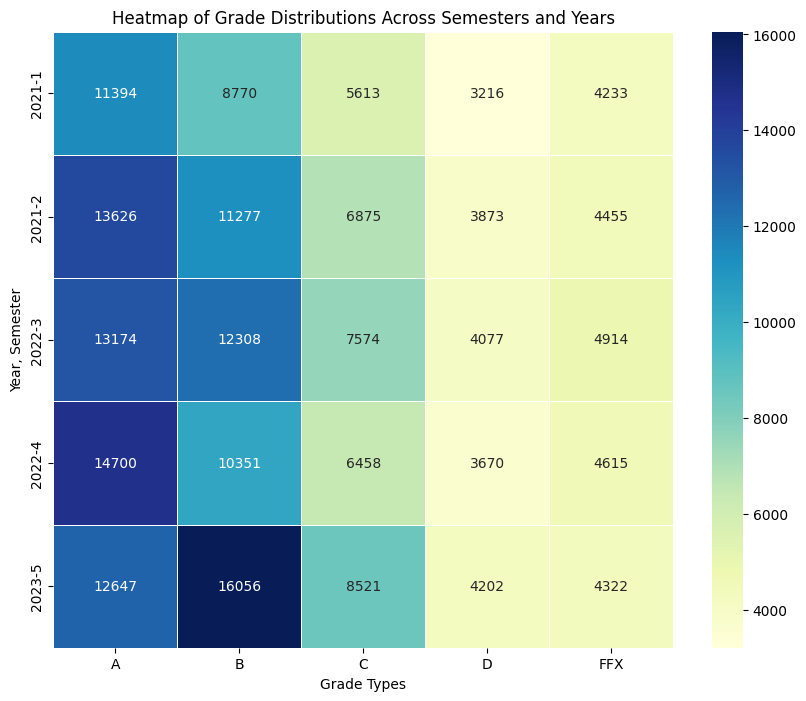

In [59]:
grades_by_time = df.groupby(['Year', 'Semester'])[['A', 'B', 'C', 'D', 'FFX']].sum().astype(int)  # Convert to int

plt.figure(figsize=(10, 8))
sns.heatmap(grades_by_time, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Grade Distributions Across Semesters and Years')
plt.xlabel('Grade Types')
plt.ylabel('Year, Semester')
plt.show()

In [ ]:
# After normalizing grade counts to proportions, overall grading patterns appear
# relatively stable across semesters. High grades (A and B) consistently account for
# approximately 60–65% of outcomes, while lower grades (D and FFX) remain below 20%
# throughout the observation period.

# Notably, the final semester (2023–5) exhibits a visible redistribution within the
# high-grade category, with the proportion of B grades increasing to approximately
# 35% while the share of A grades declines to around 28%. At the same time, the
# proportion of failing outcomes (FFX) decreases to below 10%.

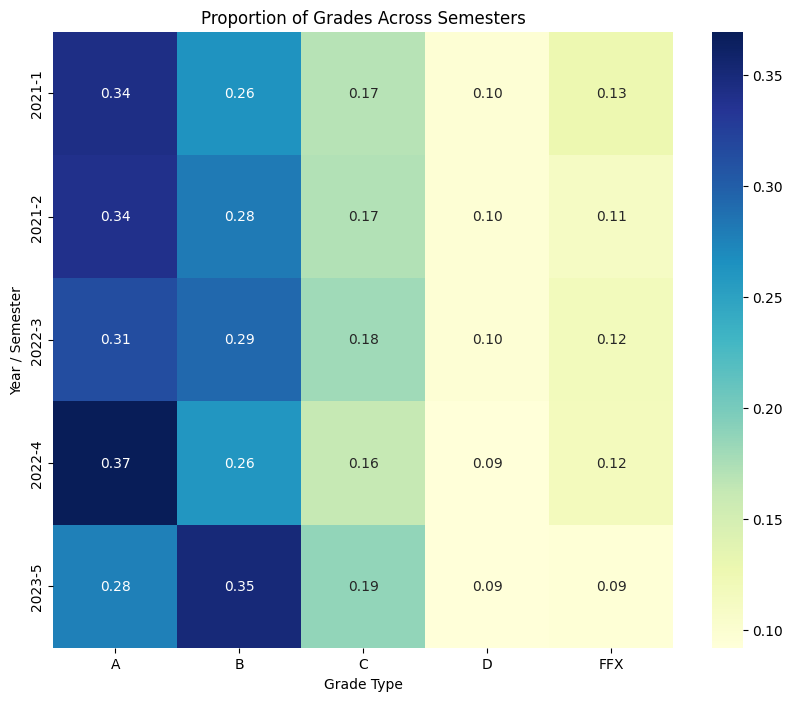

In [60]:
grades_sum = df.groupby(['Year', 'Semester'])[['A','B','C','D','FFX']].sum()
grades_pct = grades_sum.div(grades_sum.sum(axis=1), axis=0)

plt.figure(figsize=(10,8))
sns.heatmap(
    grades_pct,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu"
)
plt.title("Proportion of Grades Across Semesters")
plt.xlabel("Grade Type")
plt.ylabel("Year / Semester")
plt.show()

In [ ]:
# The stacked bar chart highlights the internal composition of grades within each
# semester, allowing direct comparison independent of cohort size. Across all periods,
# high-performing outcomes (A and B) dominate the grade distribution, while failing
# outcomes (FFX) consistently represent a small share.

# Across later semesters, a modest rebalancing is observed within the high-grade
# category: B grades increase in relative importance, while A grades become less
# dominant. Despite this internal shift, the combined share of high-performing outcomes
# remains broadly stable, suggesting gradual rather than structural changes in grading
# patterns.

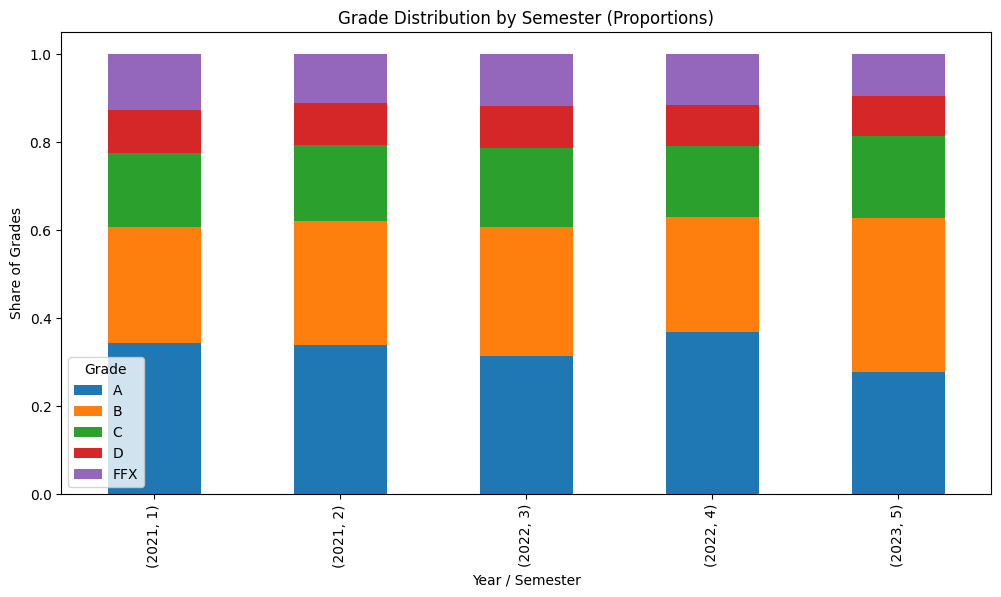

In [61]:
grades_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)
plt.title("Grade Distribution by Semester (Proportions)")
plt.ylabel("Share of Grades")
plt.xlabel("Year / Semester")
plt.legend(title="Grade")
plt.show()

In [63]:
high_low = pd.DataFrame()
high_low['High'] = grades_sum['A'] + grades_sum['B']
high_low['Low'] = grades_sum['D'] + grades_sum['FFX']

high_low_pct = high_low.div(high_low.sum(axis=1), axis=0)

high_low_pct_reset = high_low_pct.reset_index()

high_low_pct_reset['Time'] = (
    high_low_pct_reset['Year'].astype(str)
    + '-'
    + high_low_pct_reset['Semester'].astype(str)
)

In [ ]:
# This figure compares the share of high-performing outcomes (A–B) and low-performing outcomes
# (D–FFX) across semesters. Over the observed period, high-grade outcomes increase from
# approximately 73% in early 2021 to around 76% by 2023–5, representing a gain of roughly
# 3 percentage points.

# Conversely, low-grade outcomes decline from approximately 27% to about 23% over the same
# period. While fluctuations are observed between intermediate semesters, the overall pattern
# suggests a gradual divergence between high and low outcomes rather than abrupt shifts.

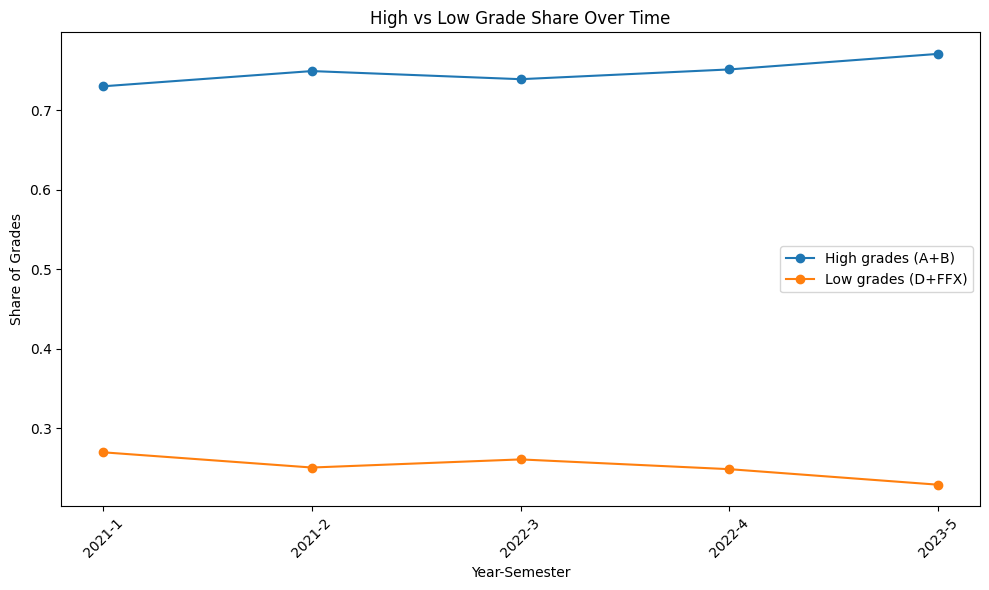

In [64]:
plt.figure(figsize=(10,6))

plt.plot(
    high_low_pct_reset['Time'],
    high_low_pct_reset['High'],
    marker='o',
    label='High grades (A+B)'
)

plt.plot(
    high_low_pct_reset['Time'],
    high_low_pct_reset['Low'],
    marker='o',
    label='Low grades (D+FFX)'
)

plt.title('High vs Low Grade Share Over Time')
plt.xlabel('Year-Semester')
plt.ylabel('Share of Grades')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# The department-level grade composition plots reveal substantial heterogeneity in grading
# patterns across academic disciplines. While overall trends suggest modest improvements
# in outcome quality, the magnitude and structure of changes differ notably by department.

# The MDE (Languages) department exhibits the most stable grading profile, consistently maintaining
# a high share of A–B outcomes (approximately 70–80%) and a very low share of failing
# outcomes (FFX), with minimal variation across semesters. Similarly, the PED (Education & Humanities) faculty
# shows relatively stable grade distributions over time, suggesting limited structural
# change in grading outcomes.

# In contrast, ENG (Engineering & Natural Sciences) and LAW (Law & Social Sciences) faculties display greater volatility in grade composition.
# Both departments experience noticeable fluctuations in high-performing outcomes and
# failure rates across semesters, with ENG in particular showing a pronounced reduction
# in FFX in the final observed period. The BS department occupies an intermediate position,
# with moderate variability and a gradual redistribution within high grades rather than
# a clear upward or downward trend.

# Taken together, these patterns indicate that changes in academic outcomes are not
# uniform across the institution but are instead concentrated within specific departments,
# highlighting the importance of examining discipline-level dynamics alongside aggregate
# trends.

In [65]:
def plot_grade_composition(df_subset, title):
    grade_cols = ['A', 'B', 'C', 'D', 'FFX']

    agg = (
        df_subset
        .groupby(['Year', 'Semester'])[grade_cols]
        .sum()
        .reset_index()
        .sort_values(['Year', 'Semester'])
    )

    agg[grade_cols] = agg[grade_cols].div(
        agg[grade_cols].sum(axis=1),
        axis=0
    )

    agg['Time'] = agg['Year'].astype(str) + '-' + agg['Semester'].astype(str)

    plt.figure(figsize=(12,6))

    bottom = None
    colors = {
        'A': '#2ca02c',
        'B': '#1f77b4',
        'C': '#ff7f0e',
        'D': '#d62728',
        'FFX': '#7f7f7f'
    }

    for grade in grade_cols:
        plt.bar(
            agg['Time'],
            agg[grade],
            bottom=bottom,
            label=grade,
            color=colors[grade]
        )
        bottom = agg[grade] if bottom is None else bottom + agg[grade]

    plt.title(title)
    plt.xlabel('Year–Semester')
    plt.ylabel('Share of Grades')
    plt.legend(title='Grade')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

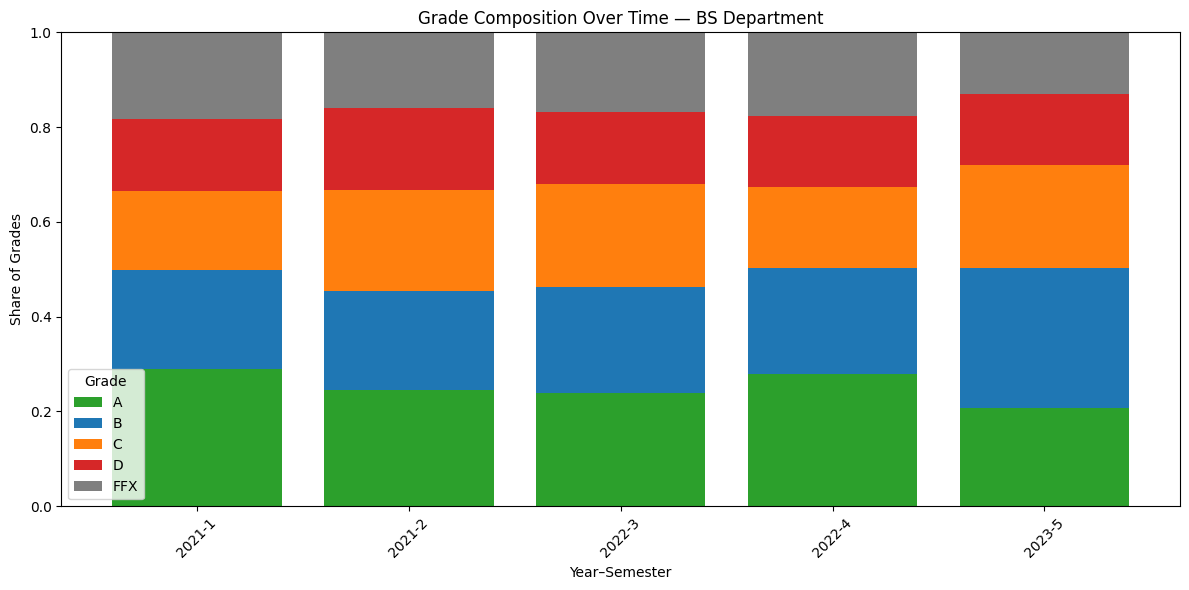

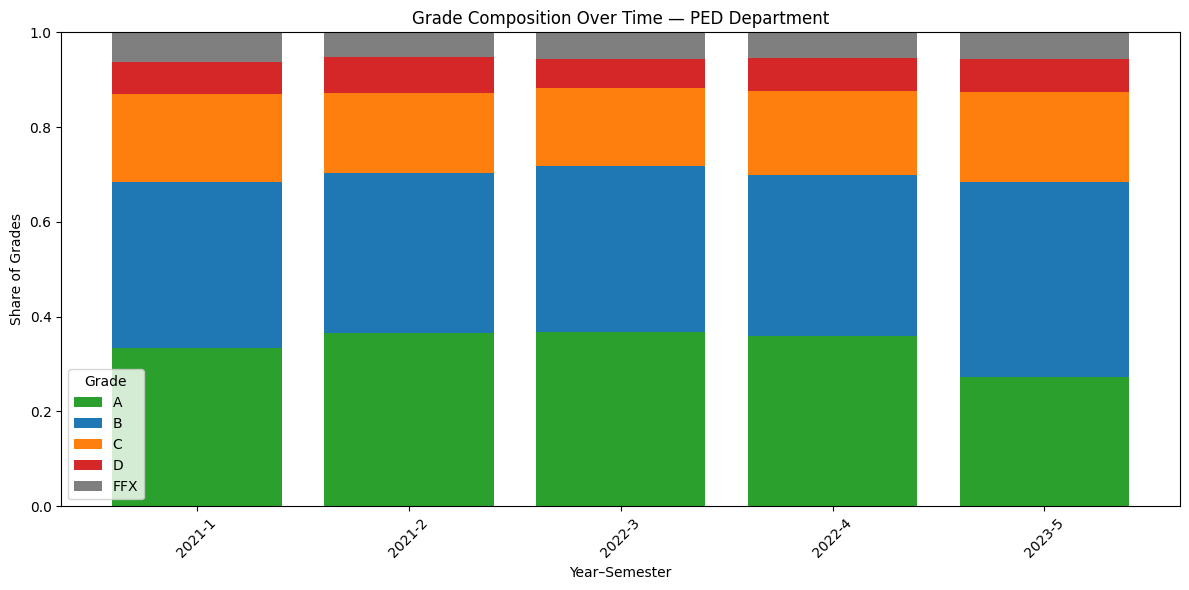

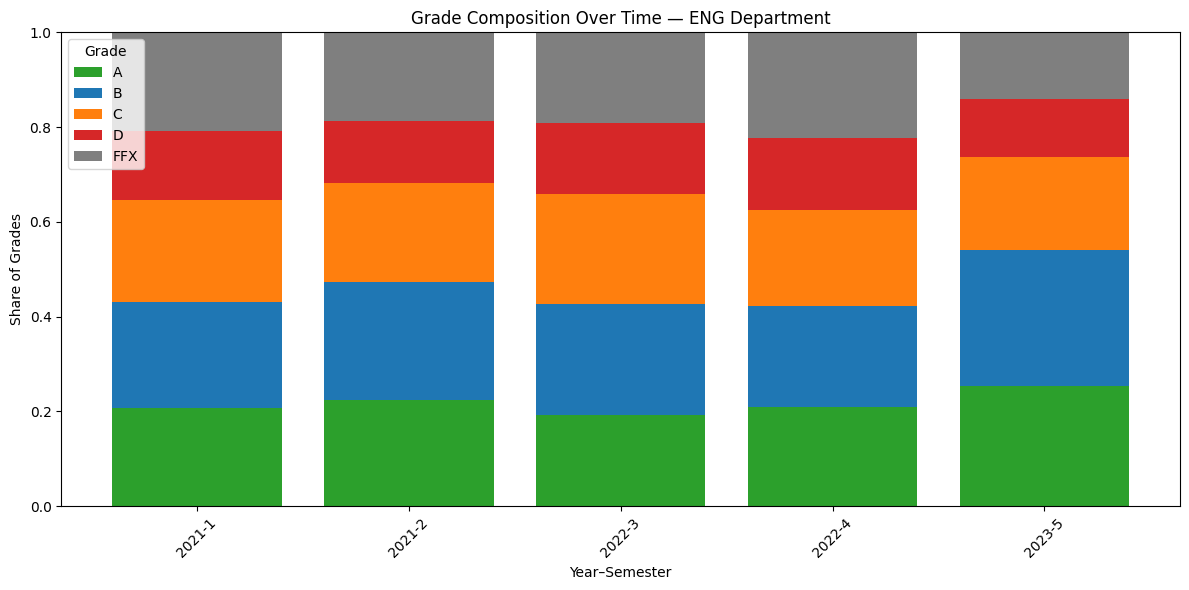

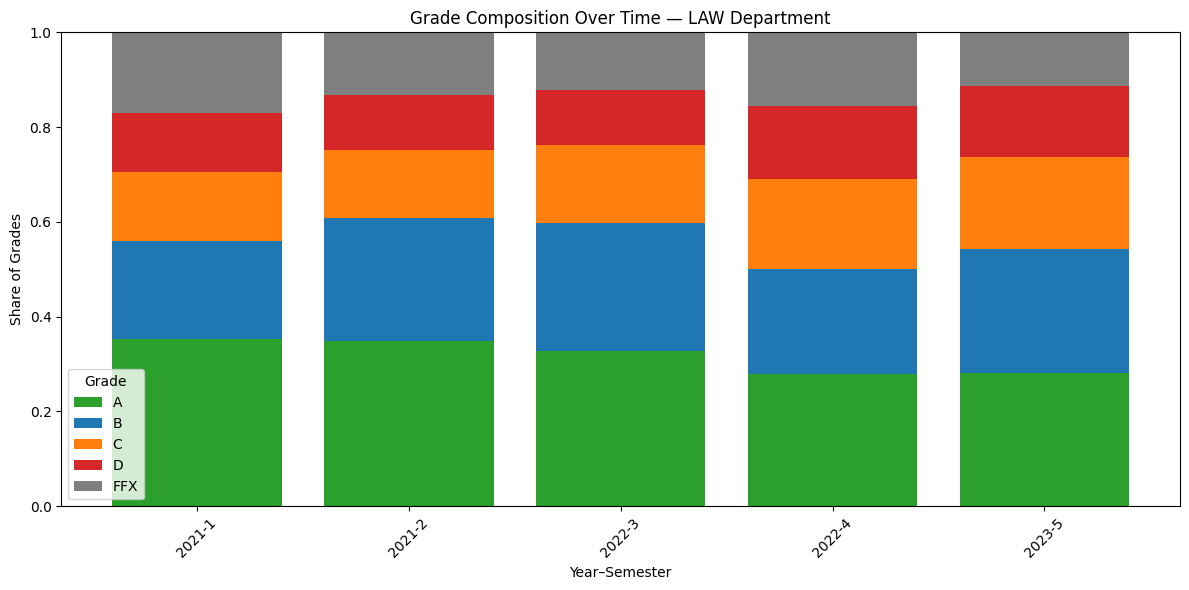

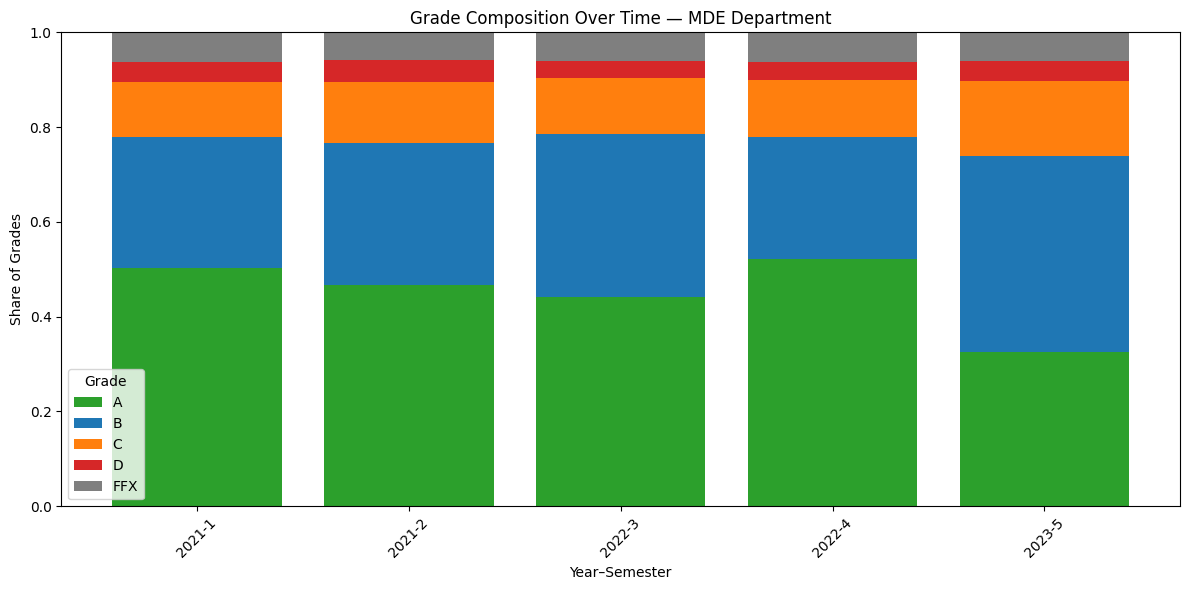

In [66]:
departments = ['BS', 'PED', 'ENG', 'LAW', 'MDE']

for dept in departments:
    df_dept = df[df['Dept'] == dept]
    plot_grade_composition(
        df_dept,
        title=f'Grade Composition Over Time — {dept} Department'
    )

In [ ]:
# This figure summarizes overall outcome dynamics by grouping grades into high (A–B),
# mid-range (C–D), and failure (FFX) categories. High-performing outcomes increase from
# approximately 60% to 63% across the observation window, while failure outcomes decline
# from around 12% to below 10%.

# Mid-range outcomes (C–D) remain comparatively stable, fluctuating within a narrow band
# of approximately 25–28%. This pattern indicates that observed changes in grading outcomes
# are driven primarily by shifts at the upper and lower ends of the distribution rather than
# compression toward the middle.

In [67]:
grade_cols = ['A', 'B', 'C', 'D', 'FFX']

def prepare_grade_pct(df_subset):
    agg = (
        df_subset
        .groupby(['Year', 'Semester'])[grade_cols]
        .sum()
        .reset_index()
        .sort_values(['Year', 'Semester'])
    )

    agg[grade_cols] = agg[grade_cols].div(
        agg[grade_cols].sum(axis=1),
        axis=0
    )

    agg['Time'] = agg['Year'].astype(str) + '-' + agg['Semester'].astype(str)
    return agg

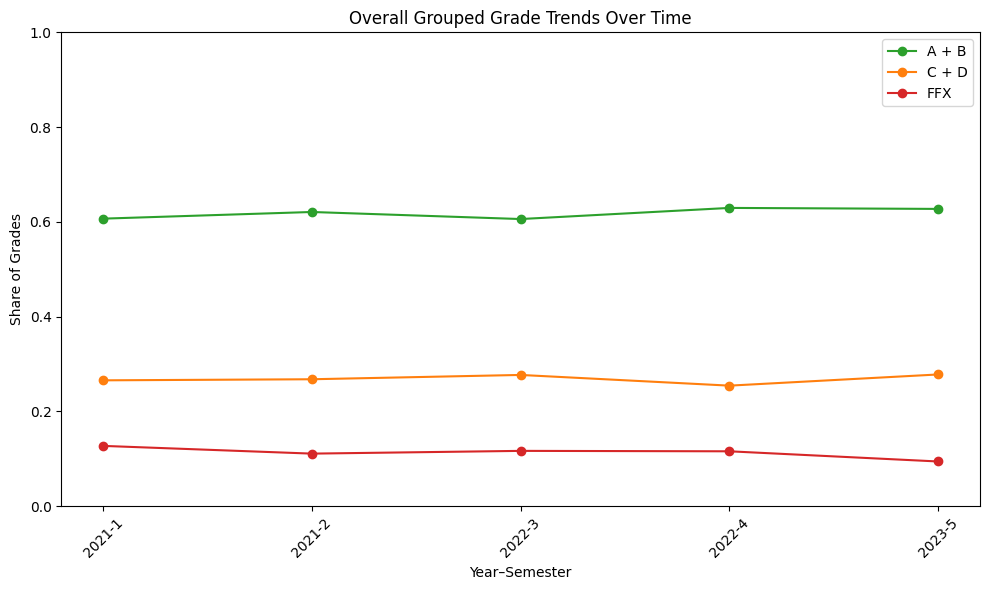

In [75]:
overall = prepare_grouped_grade_pct(df)

plt.figure(figsize=(10,6))
plt.plot(overall['Time'], overall['A_B'], marker='o', label='A + B', color='#2ca02c')
plt.plot(overall['Time'], overall['C_D'], marker='o', label='C + D', color='#ff7f0e')
plt.plot(overall['Time'], overall['FFX'], marker='o', label='FFX', color='#d62728')

plt.title('Overall Grouped Grade Trends Over Time')
plt.xlabel('Year–Semester')
plt.ylabel('Share of Grades')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# This figure compares grouped grade outcomes in Engineering (ENG) courses with all other
# departments combined. Across all semesters, ENG courses consistently exhibit a lower
# share of high-performing outcomes (A–B) compared to non-ENG courses, with a gap of
# approximately 20–25 percentage points.

# At the same time, ENG courses display a substantially higher share of failure outcomes
# (FFX), particularly in earlier semesters, where FFX rates are roughly double those
# observed in other departments. While both ENG and non-ENG groups show a decline in FFX
# in the final semester, the magnitude of improvement is more pronounced within ENG,
# suggesting greater sensitivity of engineering outcomes to temporal or contextual factors.

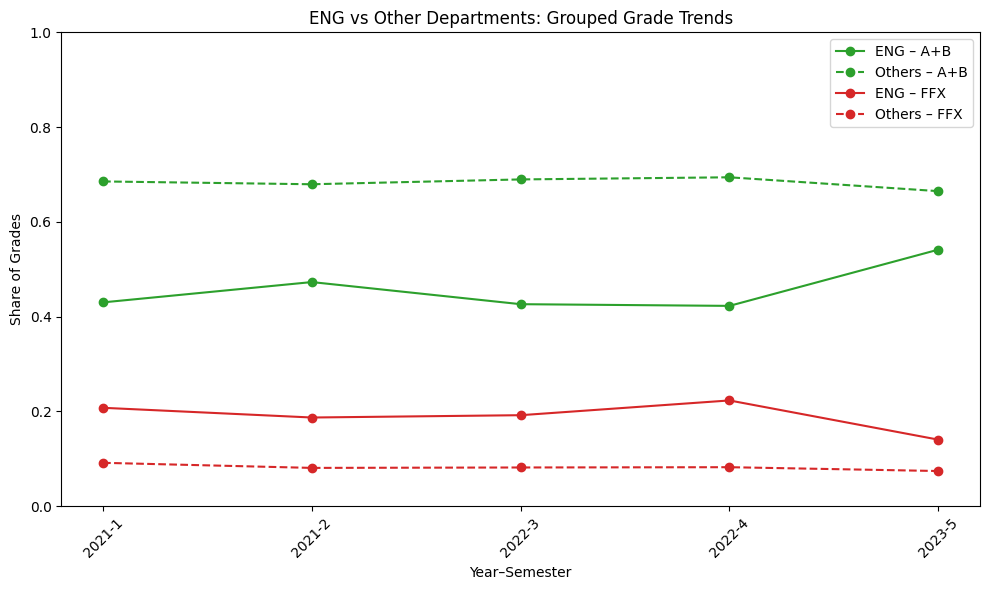

In [76]:
eng = prepare_grouped_grade_pct(df[df['Dept'] == 'ENG'])
others = prepare_grouped_grade_pct(df[df['Dept'] != 'ENG'])

plt.figure(figsize=(10,6))

plt.plot(eng['Time'], eng['A_B'], marker='o', label='ENG – A+B', color='#2ca02c')
plt.plot(others['Time'], others['A_B'], marker='o', linestyle='--', label='Others – A+B', color='#2ca02c')

plt.plot(eng['Time'], eng['FFX'], marker='o', label='ENG – FFX', color='#d62728')
plt.plot(others['Time'], others['FFX'], marker='o', linestyle='--', label='Others – FFX', color='#d62728')

plt.title('ENG vs Other Departments: Grouped Grade Trends')
plt.xlabel('Year–Semester')
plt.ylabel('Share of Grades')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# Grouped grade trends by department further illustrate substantial differences in outcome
# structure across academic disciplines. The MDE department consistently maintains the
# highest share of high-performing outcomes (A–B), exceeding 70% across all semesters,
# while exhibiting minimal variation in failure rates.

# PED and BS departments show moderate stability, with high-grade shares fluctuating within
# a relatively narrow range and failure outcomes remaining below 10% in most periods.
# In contrast, ENG and LAW departments display greater volatility, with noticeable swings
# in both high-performing and failing outcomes across semesters.

# These patterns indicate that institution-wide trends mask important department-level
# dynamics, and that observed changes in aggregate outcomes are disproportionately driven
# by a subset of disciplines rather than uniform shifts across the university.

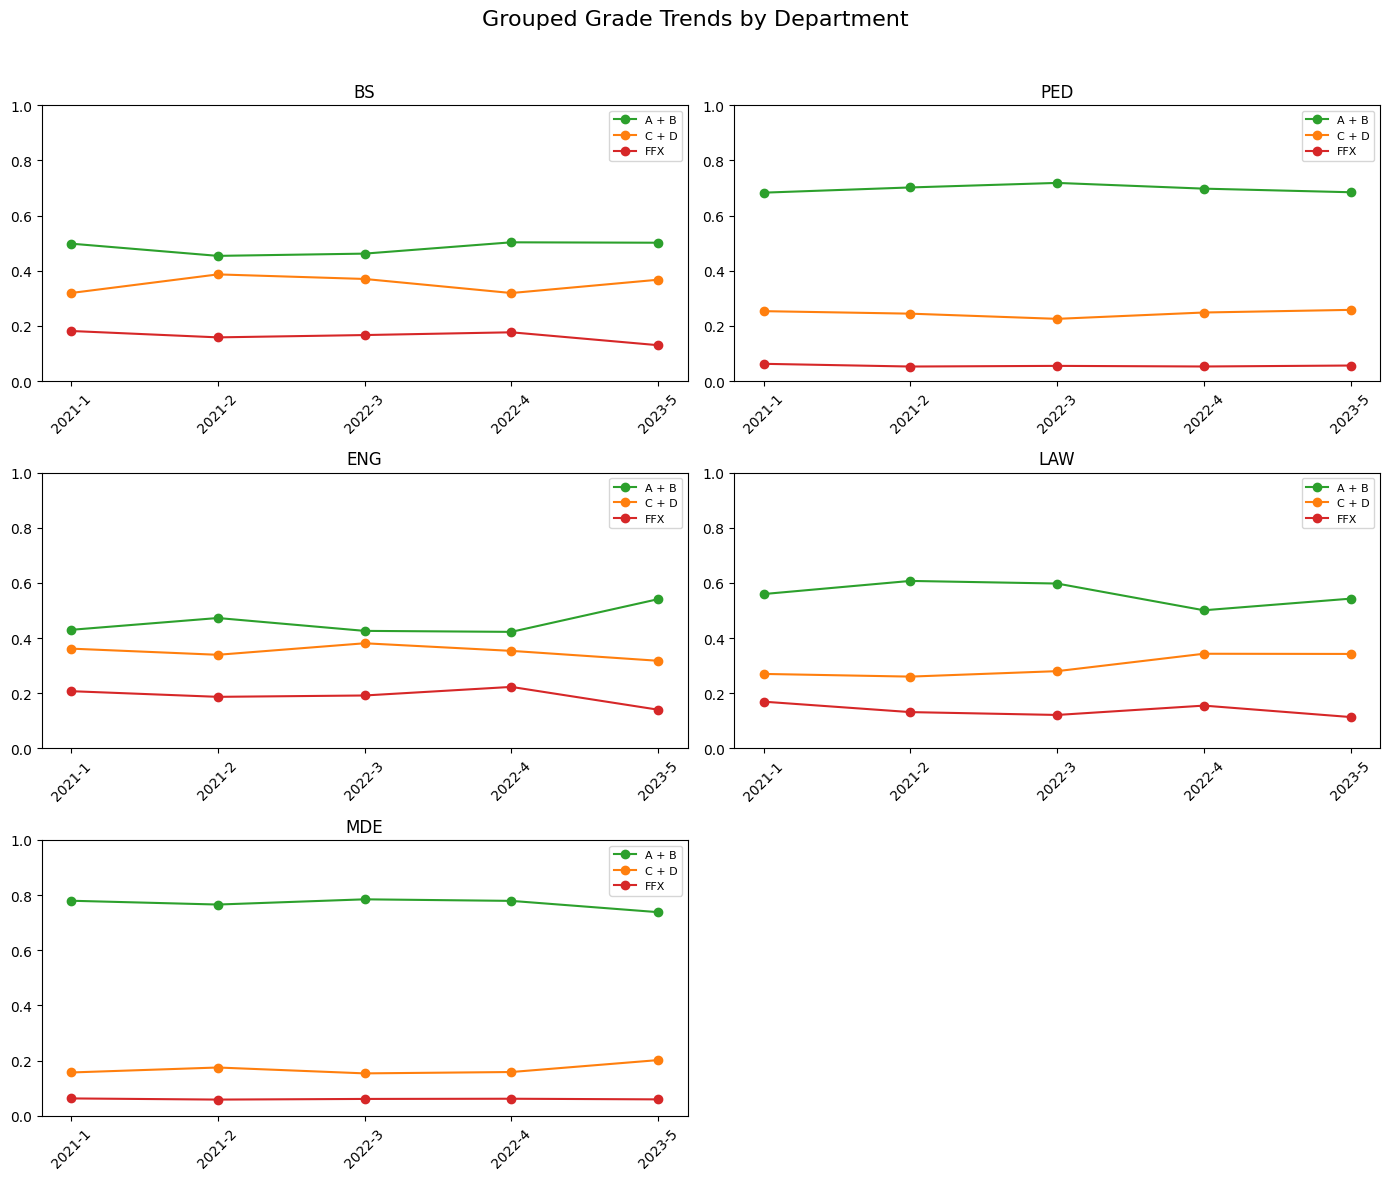

In [73]:
departments = ['BS', 'PED', 'ENG', 'LAW', 'MDE']

fig, axes = plt.subplots(3, 2, figsize=(14,12))
axes = axes.flatten()

for ax, dept in zip(axes, departments):
    dept_df = prepare_grouped_grade_pct(df[df['Dept'] == dept])

    ax.plot(dept_df['Time'], dept_df['A_B'], marker='o', label='A + B', color='#2ca02c')
    ax.plot(dept_df['Time'], dept_df['C_D'], marker='o', label='C + D', color='#ff7f0e')
    ax.plot(dept_df['Time'], dept_df['FFX'], marker='o', label='FFX', color='#d62728')

    ax.set_title(dept)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(fontsize=8)

fig.delaxes(axes[-1])

fig.suptitle('Grouped Grade Trends by Department', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [77]:
df_with_period = df.copy()

df_with_period['Period'] = df_with_period['Year'].apply(
    lambda y: 'Pre-LLM' if y <= 2022 else 'Post-LLM'
)

period_agg = (
    df_with_period
    .groupby('Period')[['A','B','C','D','FFX']]
    .sum()
    .reset_index()
)

period_agg['A_B'] = period_agg['A'] + period_agg['B']
period_agg['C_D'] = period_agg['C'] + period_agg['D']
period_agg['FFX'] = period_agg['FFX']

period_grouped = period_agg[['Period','A_B','C_D','FFX']].copy()

period_grouped[['A_B','C_D','FFX']] = period_grouped[['A_B','C_D','FFX']].div(
    period_grouped[['A_B','C_D','FFX']].sum(axis=1),
    axis=0
)

In [ ]:
# This figure compares aggregated grade composition between pre-LLM (2021–2022) and
# post-LLM (2023) periods. The share of high-performing outcomes (A–B) increases slightly
# in the post-LLM period, rising from approximately 62% to around 63–64%.

# At the same time, failure outcomes (FFX) decline by roughly 2 percentage points, while
# mid-range outcomes (C–D) remain largely stable. Overall, the comparison suggests a
# modest shift toward higher-grade outcomes following the introduction of LLMs, without
# substantial redistribution in the middle of the grade distribution.

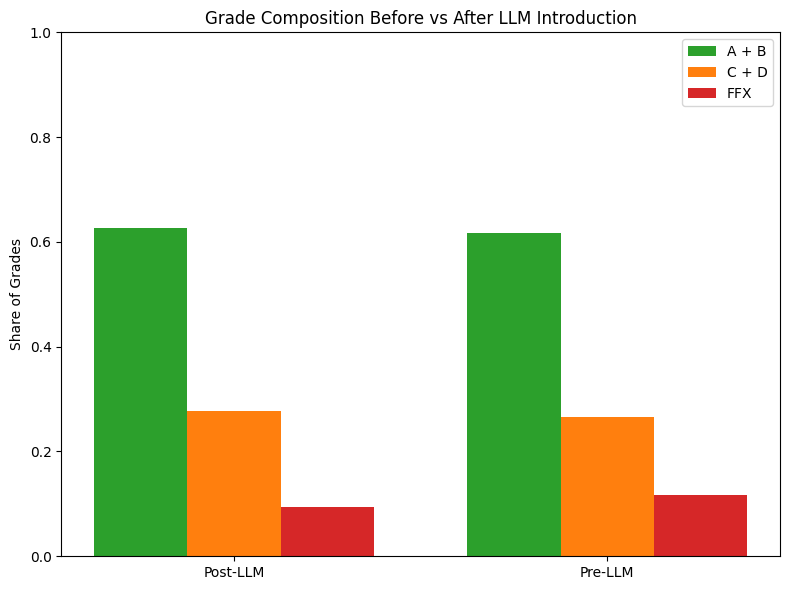

In [78]:
labels = period_grouped['Period']
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8,6))

plt.bar(x - width, period_grouped['A_B'], width, label='A + B', color='#2ca02c')
plt.bar(x, period_grouped['C_D'], width, label='C + D', color='#ff7f0e')
plt.bar(x + width, period_grouped['FFX'], width, label='FFX', color='#d62728')

plt.xticks(x, labels)
plt.ylabel('Share of Grades')
plt.title('Grade Composition Before vs After LLM Introduction')
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# Expressing grade shares as deviations from the pre-LLM baseline highlights the magnitude
# and direction of changes over time. High-performing outcomes (A–B) exhibit positive
# deviations in later semesters, reaching an increase of approximately 1–1.5 percentage
# points by 2022–4 and remaining elevated in 2023–5.

# In contrast, failure outcomes (FFX) show a consistent downward deviation from baseline,
# culminating in a reduction of approximately 2–2.5 percentage points in the final
# semester. Changes in mid-range outcomes (C–D) fluctuate around zero, indicating no
# systematic trend in this category. Together, these patterns suggest gradual, cumulative
# shifts rather than abrupt structural changes.

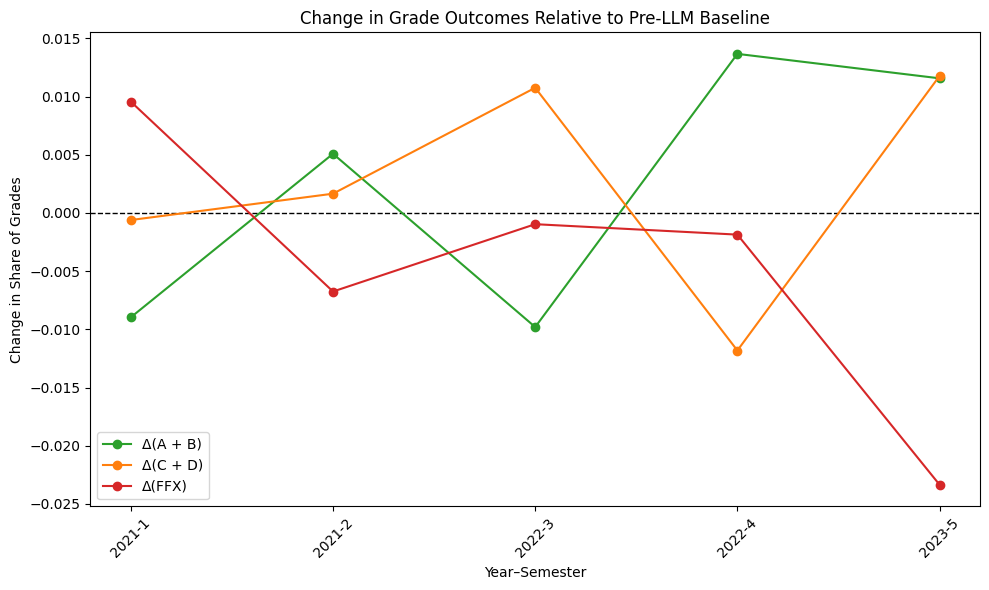

In [81]:
overall = prepare_grouped_grade_pct(df)

baseline = overall[overall['Year'] <= 2022][['A_B','C_D','FFX']].mean()

delta = overall.copy()

delta['Δ_A_B'] = delta['A_B'] - baseline['A_B']
delta['Δ_C_D'] = delta['C_D'] - baseline['C_D']
delta['Δ_FFX'] = delta['FFX'] - baseline['FFX']

plt.figure(figsize=(10,6))

plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.plot(delta['Time'], delta['Δ_A_B'], marker='o', label='Δ(A + B)', color='#2ca02c')
plt.plot(delta['Time'], delta['Δ_C_D'], marker='o', label='Δ(C + D)', color='#ff7f0e')
plt.plot(delta['Time'], delta['Δ_FFX'], marker='o', label='Δ(FFX)', color='#d62728')

plt.title('Change in Grade Outcomes Relative to Pre-LLM Baseline')
plt.xlabel('Year–Semester')
plt.ylabel('Change in Share of Grades')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion

In [82]:
## Conclusion

# This study explored how academic outcomes evolved before and after the introduction of
# large language models (LLMs), using institutional grading data across multiple semesters
# and academic departments. By examining grade distributions over time and across disciplines,
# the analysis aimed to identify descriptive patterns rather than establish causal effects.

# Across the full sample, the share of high-performing outcomes (A–B) increased modestly
# over time by approximately 2–3 percentage points, while failure outcomes (FFX) declined
# by a similar magnitude. These changes emerged gradually rather than abruptly, suggesting
# incremental shifts in outcome composition rather than a structural break coinciding with
# LLM introduction. Mid-range outcomes (C–D) remained largely stable throughout the period.

# Department-level analysis revealed substantial heterogeneity. Some departments (e.g., MDE
# and PED) exhibited highly stable grading profiles with consistently high shares of A–B
# outcomes, while others (notably ENG and LAW) displayed greater volatility and more pronounced
# changes in failure rates. This indicates that aggregate trends mask important discipline-
# specific dynamics.

# Comparisons between pre-LLM (2021–2022) and post-LLM (2023) periods suggest a small shift
# toward higher-grade outcomes and fewer failures following LLM introduction, though the
# magnitude of change remains limited. Given the observational nature of the data and the
# absence of controls for confounding factors, these findings should be interpreted as
# descriptive rather than causal.

# Overall, the results highlight the importance of examining both aggregate and department-
# level patterns when assessing changes in academic outcomes in the context of emerging
# educational technologies.